ARIMA and S-ARIMA (Seasonal) [link text](https://people.duke.edu/~rnau/Slides_on_ARIMA_models--Robert_Nau.pdf)

Source [link text](https://people.duke.edu/~rnau/411arim3.htm)

Parameters [link text](https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/)


In [1]:
!pip install pmdarima
import pandas as pd
import numpy as np
from google.colab import files 

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 13.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
# Read your csv file as dataframe
df = pd.read_csv('aapl.us.txt', index_col='Date', parse_dates = True)
# Removes any null values
df = df.dropna()

# Data for last number of years
# df = df.last('7Y')

# Data after a certain point in time
# df = df.loc[df['Date'] >= '2000-01-01']

print('Shape of data', df.shape)
print(df.head(10))

# Choose your attribute "Open", "High", "Low", "Close", "Volume", "OpenInt"
attribute = 'Close'

Shape of data (8364, 6)
               Open     High      Low    Close    Volume  OpenInt
Date                                                             
1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030        0
1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532        0
1984-09-11  0.42516  0.43668  0.42516  0.42902  42498199        0
1984-09-12  0.42902  0.43157  0.41618  0.41618  37125801        0
1984-09-13  0.43927  0.44052  0.43927  0.43927  57822062        0
1984-09-14  0.44052  0.45589  0.44052  0.44566  68847968        0
1984-09-17  0.45718  0.46357  0.45718  0.45718  53755262        0
1984-09-18  0.45718  0.46103  0.44052  0.44052  27136886        0
1984-09-19  0.44052  0.44566  0.43157  0.43157  29641922        0
1984-09-20  0.43286  0.43668  0.43286  0.43286  18453585        0


In [3]:
#data preprocessing

#We parse the date to the correct format
df.index = pd.to_datetime(df.index)
#df.info()

df_month = df.groupby(pd.Grouper(freq='M')).mean()
df_quarter = df.groupby(pd.Grouper(freq='Q')).mean()

#creating another date column for month, year and quarter so we can 'groupby' later
# df['month'] = df.index.dt.to_period("M")
# df['year'] = df['Date'].dt.to_period("Y")
# df['quarter'] = df['Date'].dt.quarter

#df for Monthly
# df_month = df.groupby(['month']).agg(
#     mean_open = pd.NamedAgg(column='Open', aggfunc='mean'),
#     mean_high = pd.NamedAgg(column='High', aggfunc='mean'),
#     mean_low = pd.NamedAgg(column='Low', aggfunc='mean'),
#     mean_close = pd.NamedAgg(column='Close', aggfunc='mean'),
#     mean_volume = pd.NamedAgg(column='Volume', aggfunc='mean')
# )

#df for Quarterly 
# df_quarter = df.groupby(['year', 'quarter']).agg(
#     mean_open = pd.NamedAgg(column='Open', aggfunc='mean'),
#     mean_high = pd.NamedAgg(column='High', aggfunc='mean'),
#     mean_low = pd.NamedAgg(column='Low', aggfunc='mean'),
#     mean_close = pd.NamedAgg(column='Close', aggfunc='mean'),
#     mean_volume = pd.NamedAgg(column='Volume', aggfunc='mean')
# )

# df for fixed number of points
df = df[-35:]
df_month = df_month[-35:]
df_quarter = df_quarter[-35:]

print(df.head(10))
print(df_month.head(10))
print(df_quarter.head(10))


              Open    High     Low   Close    Volume  OpenInt
Date                                                         
2017-09-25  149.45  151.29  148.63  150.01  44528320        0
2017-09-26  151.24  153.37  151.15  152.59  36757890        0
2017-09-27  153.25  154.16  152.99  153.68  25494693        0
2017-09-28  153.34  153.73  152.15  152.73  22063341        0
2017-09-29  152.66  153.58  151.46  153.57  26359485        0
2017-10-02  153.71  153.90  152.17  153.26  18749860        0
2017-10-03  153.46  154.53  153.36  153.92  16277486        0
2017-10-04  153.08  153.31  151.91  152.93  20188277        0
2017-10-05  153.63  154.88  153.50  154.83  21341803        0
2017-10-06  154.41  154.93  154.01  154.74  17448243        0
                  Open        High  ...        Volume  OpenInt
Date                                ...                       
2015-01-31  105.239500  106.251000  ...  7.240352e+07      0.0
2015-02-28  118.748421  119.808421  ...  6.293044e+07      0.0
2015

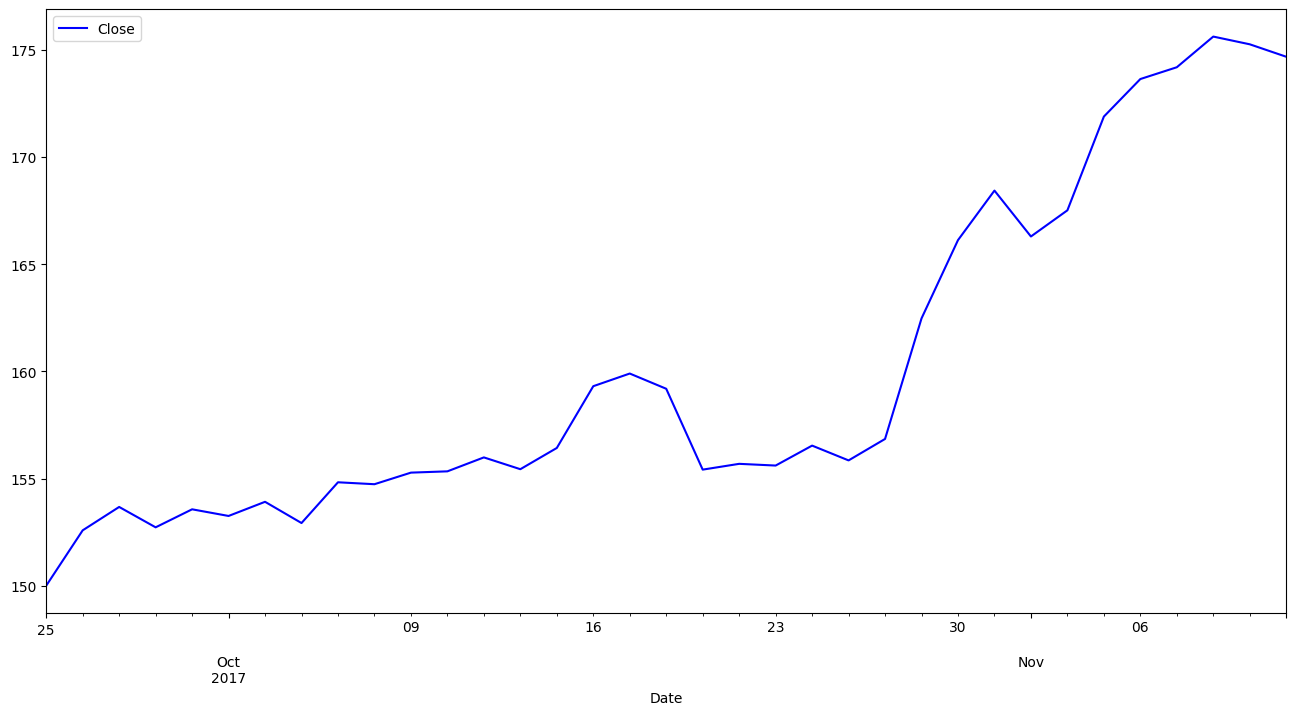

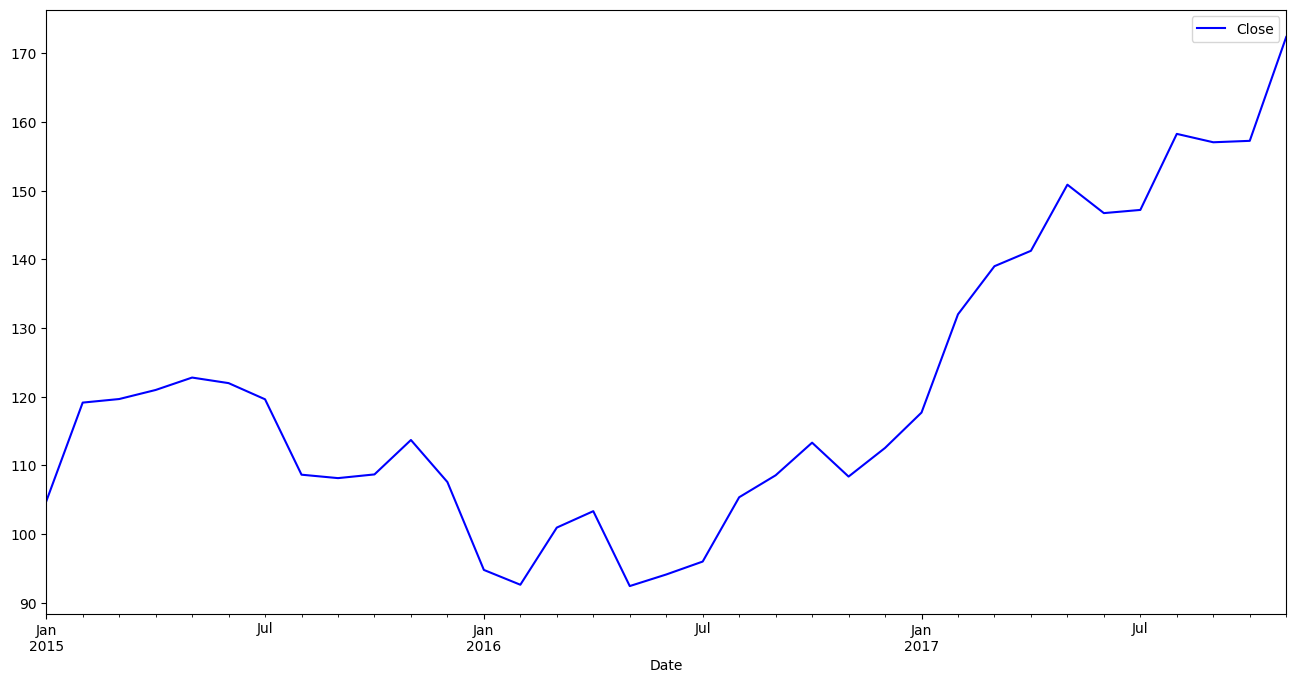

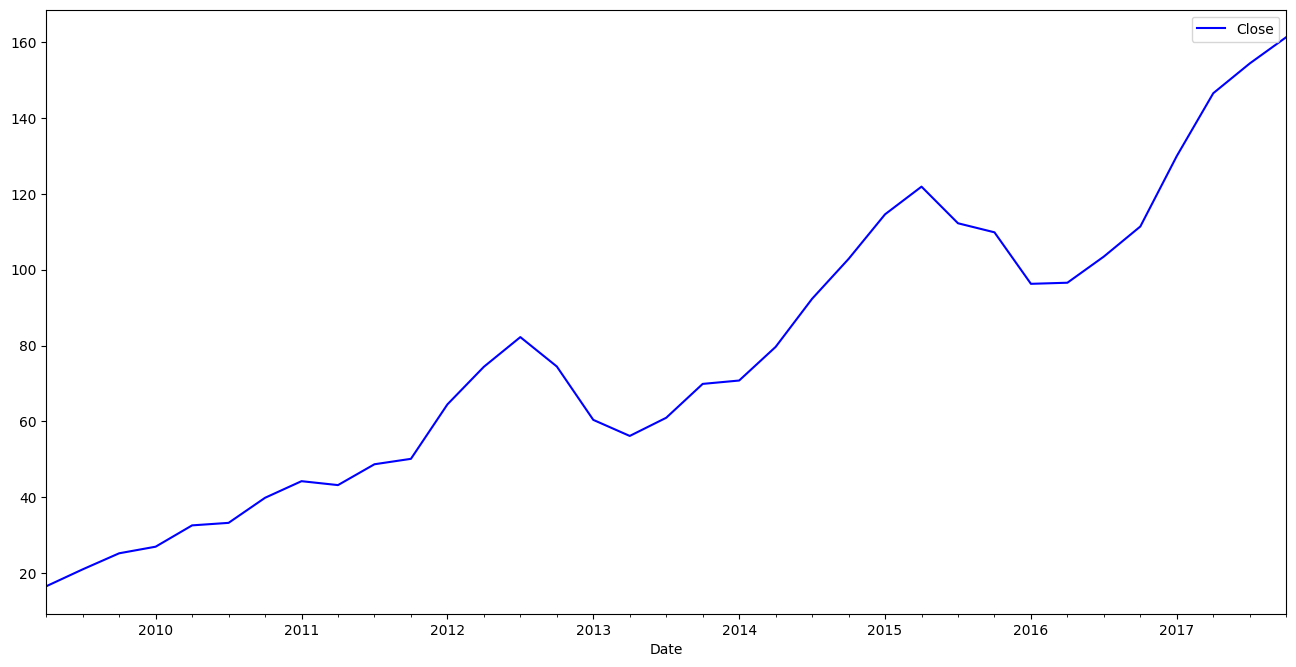

In [4]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(16,8), dpi=100)
df['Close'].plot(legend = True, color='blue')

figure(figsize=(16,8), dpi=100)
df_month[attribute].plot(legend = True, color='blue')

figure(figsize=(16,8), dpi=100)
df_quarter[attribute].plot(legend = True, color='blue')

# Set the correct attribute and dataset

In [5]:
#df can equal df, df_month and df_quarter
# df = df
# df = df_month
df = df_quarter
#attribute can be 'Close', 'mean_close', 
# attribute = 'Close'
# attribute = 'mean_close'

Make sure that your data is stationary

In [6]:
from statsmodels.tsa.stattools import adfuller
# This will tell us if the data is stationary
# We want to know the P-Value, we want as small as possible!
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF: ", dftest[0])
  print("2. P-Value: ", dftest[1])
  print("3. Num of Lags: ", dftest[2])
  print("4. Num of Observations Used for ADF Regression and Critical Values Calculation: ", dftest[3])
  print("5. Critical Values: ")
  for k, v in dftest[4].items():
    print("\t", k, ": ", v)

In [7]:
ad_test(df[attribute])

1. ADF:  0.10570680665475155
2. P-Value:  0.9664485712703824
3. Num of Lags:  7
4. Num of Observations Used for ADF Regression and Critical Values Calculation:  27
5. Critical Values: 
	 1% :  -3.6996079738860943
	 5% :  -2.9764303469999494
	 10% :  -2.627601001371742


In [8]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [9]:
print(df.shape)
percent = 0.7 #choose between 0 and 1
num_of_train = int(df.shape[0]*(percent))
train = df.iloc[:num_of_train]
test = df.iloc[num_of_train:]
print(train.shape, test.shape)
print(train)

(35, 6)
(24, 6) (11, 6)
                  Open        High  ...        Volume  OpenInt
Date                                ...                       
2009-06-30   16.513841   16.761508  ...  1.499119e+08      0.0
2009-09-30   20.994156   21.204937  ...  1.263991e+08      0.0
2009-12-31   25.297656   25.537281  ...  1.423977e+08      0.0
2010-03-31   27.020328   27.270164  ...  1.736388e+08      0.0
2010-06-30   32.697238   33.044032  ...  2.058918e+08      0.0
2010-09-30   33.269203   33.619422  ...  1.613376e+08      0.0
2010-12-31   39.881625   40.158953  ...  1.245868e+08      0.0
2011-03-31   44.222935   44.583306  ...  1.410675e+08      0.0
2011-06-30   43.320603   43.632143  ...  1.123139e+08      0.0
2011-09-30   48.683344   49.278984  ...  1.684445e+08      0.0
2011-12-31   50.192778   50.642698  ...  1.255234e+08      0.0
2012-03-31   64.367403   64.944968  ...  1.513476e+08      0.0
2012-06-30   74.616190   75.319714  ...  1.513367e+08      0.0
2012-09-30   82.143333   82.799

In [10]:
# The magic
#SEASONAL PERIOD SET TO M: Daily = 7, Monthly = 12, Weekly = 52, Quarterly = 4, 1 = Annual
stepwise_fit = auto_arima(train[attribute], trace = True, seasonal=True, m = 4, suppress_warnings = True, n_jobs=-1)
#model_auto = auto_arima(train[attribute], seasonal = True, m = 12, n_jobs=-1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=155.653, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=153.204, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=151.647, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=161.795, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=152.321, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[4] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,1)(0,0,2)[4] intercept   : AIC=151.991, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=153.310, Time=0.06 sec
 ARIMA(0,1,1)(1,0,2)[4] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=153.381, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[4] intercept   : AIC=153.482, Time=0.09 sec
 ARIMA(0,1,2)(0,0,1)[4] intercept   : AIC=151.842, Time=0.11 sec
 ARIMA(1,1,0)(0,0,1)[4] intercept   : AIC=152.192, Time=0.05 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=152.304, Time=0.1

In [11]:
#model_auto.summary()
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   24
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 4)   Log Likelihood                 -71.823
Date:                           Sat, 13 Nov 2021   AIC                            151.647
Time:                                   07:49:01   BIC                            156.189
Sample:                                        0   HQIC                           152.789
                                            - 24                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.8238      0.912      4.193      0.000       2.036       5.611
ma.L1          0.3868      0.170      2.274      0.023       0.053       0.720
ma.S.L4       -0.4892      0.267     -1.830      0.067      -1.013       0.035
sigma2        28.5623      8.202      3.482      0.000      12.486      44.638
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.76   Prob(JB):                         0.69
Heteroskedasticity (H):               3.74   Skew:                            -0.38
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Explaining why the model selects the parameters

Given (p, d, q) where d is the differencing done to make the data stationary. We plot this below to explain how the differencing has now affected the graph and its p-value!

1. ADF:  -5.2629193928626
2. P-Value:  6.531938612044092e-06
3. Num of Lags:  5
4. Num of Observations Used for ADF Regression and Critical Values Calculation:  27
5. Critical Values: 
	 1% :  -3.6996079738860943
	 5% :  -2.9764303469999494
	 10% :  -2.627601001371742


<Figure size 8000x4000 with 0 Axes>

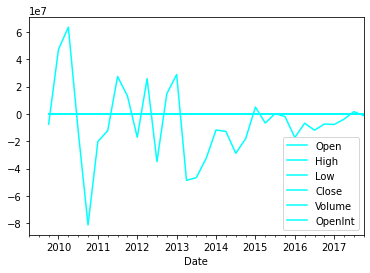

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=400)
df.diff(2).plot(legend = True, color='cyan', )
ad_test(df.diff(2).dropna()[attribute])

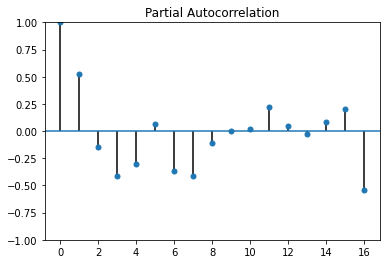

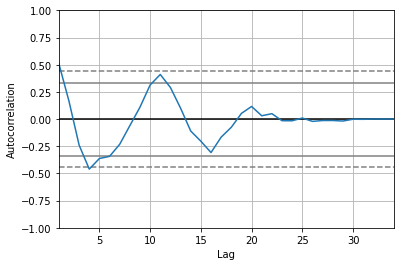

In [13]:
from pmdarima.utils import *
differencing = 1
plot_pacf(df[attribute].diff(differencing).dropna(), show=True) 
autocorr_plot(df[attribute].diff(differencing).dropna(), show=True) 
#decomposed_plot(df[attribute], show=True) 

# Fitting the model

In the previous cells, we have determined the parameters for the model with auto_arima. 
> Here, we can either make use of 
1.   statsmodels library to fit the model OR
2.   continue using pmdarima library


# pmdarima.ARIMA

In [14]:
import pmdarima as pm

model = pm.ARIMA(order = (0,1,1), seasonal_order=(0,0,1,4))
model.fit(train[attribute])

start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(n_periods = len(test))
pred = pd.DataFrame(pred)
pred.index = df.index[start:end+1]

# from matplotlib.pyplot import figure
# figure(figsize=(20,10), dpi=400)
# pred.plot(legend = True, color='cyan', )
# test[attribute].plot(legend = True, color='red')
# train[attribute].plot(legend = True, color='blue')

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   24
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 4)   Log Likelihood                 -71.823
Date:                           Sat, 13 Nov 2021   AIC                            151.647
Time:                                   07:50:56   BIC                            156.189
Sample:                                        0   HQIC                           152.789
                                            - 24                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.8238      0.912      4.193      0.000       2.036       5.611
ma.L1          0.3868      0.170      2.274      0.023       0.053       0.720
ma.S.L4       -0.4892      0.267     -1.830      0.067      -1.013       0.035
sigma2        28.5623      8.202      3.482      0.000      12.486      44.638
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.76   Prob(JB):                         0.69
Heteroskedasticity (H):               3.74   Skew:                            -0.38
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# We can observe the models diagnostics.

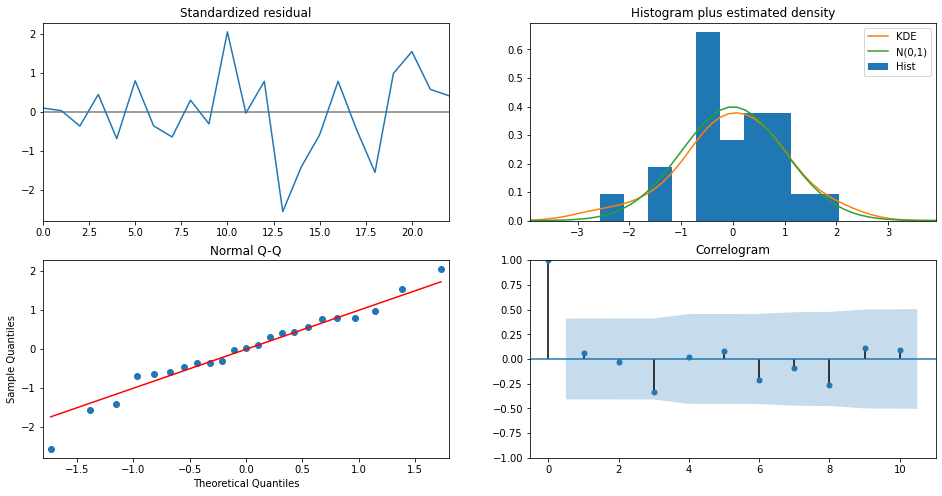

In [16]:
import matplotlib.pyplot as plt
model.plot_diagnostics(figsize=(16,8))
plt.show()

Here, we predict without updating model parameters along the way.

<Figure size 8000x4000 with 0 Axes>

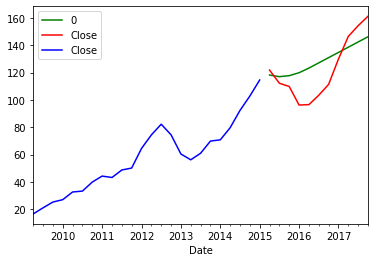

In [17]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=400)
pred.plot(legend = True, color='green', )
test[attribute].plot(legend = True, color='red')
train[attribute].plot(legend = True, color='blue')

In [18]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(test[attribute], pred))
print(rmse)

15.875716287343694


# Generate in-sample predictions from the fit ARIMA model.

Predicts the original training (in-sample) time series values. This can be useful when wanting to visualize the fit, and qualitatively inspect the efficacy of the model, or when wanting to compute the residuals of the model.



In [ ]:
in_sample = model.predict_in_sample()
in_sample = pd.DataFrame(in_sample)
in_sample.index = train.index

<Figure size 8000x4000 with 0 Axes>

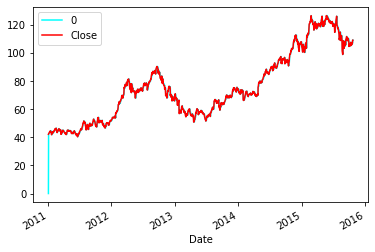

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=400)
in_sample.plot(legend = True, color='cyan')
train[attribute].plot(legend = True, color='red')


# Can we do better? - Step wise forecasting




This is different from earlier part where we just predict for the entire 30% range at one go. Here, we are predicting one step and then check the actual and make auto adjustments to the model.

Update the model fit with additional observed endog/exog values.

Updating an ARIMA adds new observations to the model, updating the MLE of the parameters accordingly by performing several new iterations (maxiter) from the existing model parameters.

Notes:
> Internally, this calls fit again using the OLD model parameters as the starting parameters for the new model’s MLE computation.




In [ ]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
import math

y_train = train[attribute]
y_test = test[attribute]

def stepwise_forecast():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in test[attribute]:
    #fc - forecast 
    #conf - confidence interval
    fc, conf = stepwise_forecast()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    # update(new_ob) = Step-wise, use real test values
    # update(fc) = Dynamic, use new forecasts
    model.update(new_ob) #It will take into account the actual outcome

print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
print(f"SMAPE: {smape(y_test, forecasts)}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, forecasts))}")
# Mean squared error: 0.34238951346274243
# SMAPE: 0.9825490519101439

Mean squared error: 2.503656204182524
SMAPE: 0.9401850519519412
Root Mean squared error: 1.5822946009458934


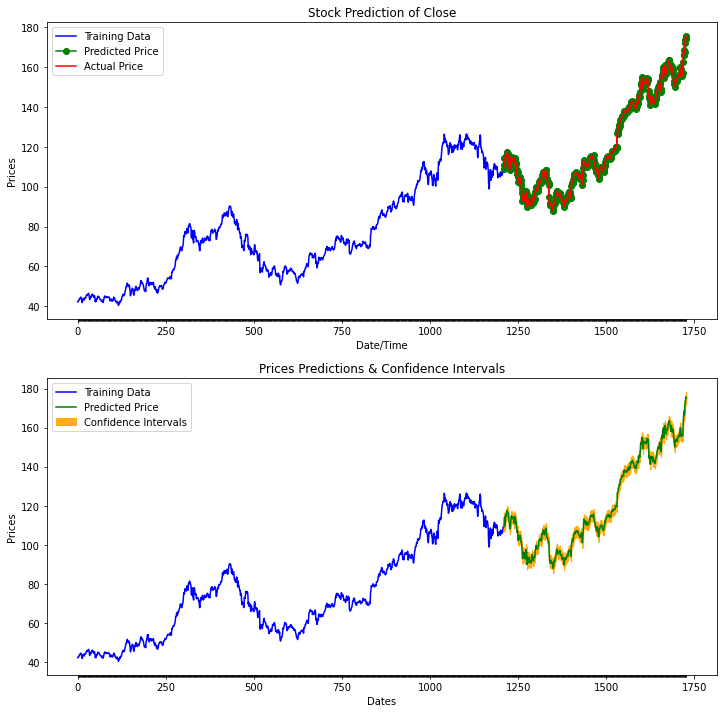

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# --------------------- Actual vs. Predicted --------------------------
#y_train = train[attribute]
#test_data = test[attribute]

axes[0].plot(np.array(train[attribute]), color='blue', label='Training Data')
axes[0].plot([len(train[attribute])+i for i in range(len(test[attribute]))], forecasts, color='green', marker='o', label='Predicted Price')

axes[0].plot([len(train[attribute])+i for i in range(len(test[attribute]))], test[attribute], color='red', label='Actual Price')
axes[0].set_title('Stock Prediction of ' + attribute)
axes[0].set_xlabel('Date/Time')
axes[0].set_ylabel('Prices')

axes[0].set_xticks([i for i in range(len(df[attribute]))], [i for i in range(len(df[attribute]))])
axes[0].legend()

# ------------------ Predicted with confidence intervals ----------------
axes[1].plot(np.array(y_train), color='blue', label='Training Data')
axes[1].plot([len(train[attribute])+i for i in range(len(test[attribute]))], forecasts, color='green',
             label='Predicted Price')

axes[1].set_title('Prices Predictions & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Prices')

conf_int = np.asarray(confidence_intervals)
axes[1].fill_between([len(train[attribute])+i for i in range(len(test[attribute]))],
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")

axes[1].set_xticks([i for i in range(len(df[attribute]))], [i for i in range(len(df[attribute]))])
axes[1].legend()



# Dynamic Forecasting
Uses each new forecast to make next prediction

In [ ]:
model = pm.ARIMA(order = (0,1,0), seasonal_order=(1, 0, 0, 7))
model.fit(train[attribute])

def dynamic_forecast():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts2 = []
confidence_intervals2 = []

for new_ob in test[attribute]:
    #fc - forecast 
    #conf - confidence interval
    fc, conf = dynamic_forecast()
    forecasts2.append(fc)
    confidence_intervals2.append(conf)

    # Updates the existing model with a small number of MLE steps
    # update(new_ob) = Step-wise, use real test values
    # update(fc) = Dynamic, use new forecasts
    model.update(fc) #It will take into account the actual outcome

print(f"Mean squared error: {mean_squared_error(y_test, forecasts2)}")
print(f"SMAPE: {smape(y_test, forecasts2)}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, forecasts2))}")
# Mean squared error: 0.34238951346274243
# SMAPE: 0.9825490519101439

Mean squared error: 285.03924597740684
SMAPE: 12.592679359589104
Root Mean squared error: 16.883105341654623


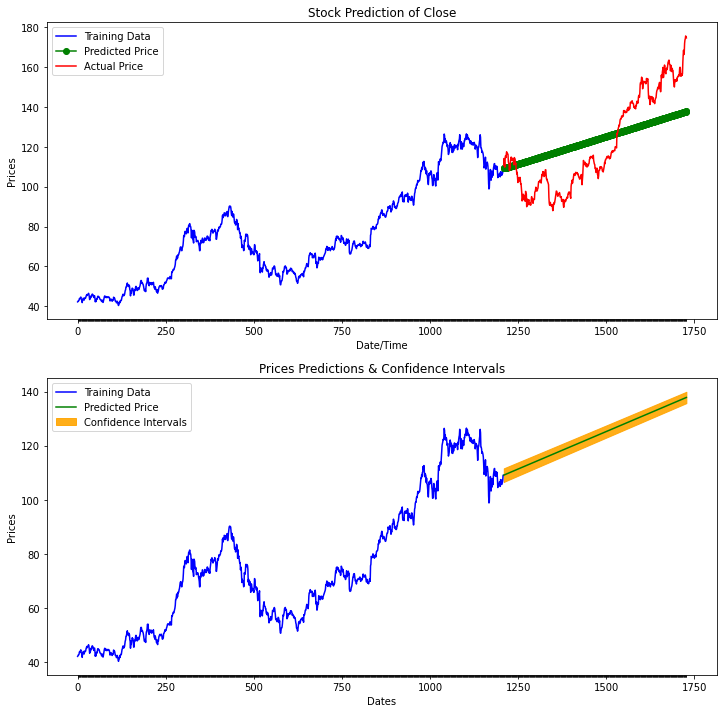

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# --------------------- Actual vs. Predicted --------------------------
#y_train = train[attribute]
#test_data = test[attribute]

axes[0].plot(np.array(train[attribute]), color='blue', label='Training Data')
axes[0].plot([len(train[attribute])+i for i in range(len(test[attribute]))], forecasts2, color='green', marker='o', label='Predicted Price')

axes[0].plot([len(train[attribute])+i for i in range(len(test[attribute]))], test[attribute], color='red', label='Actual Price')
axes[0].set_title('Stock Prediction of ' + attribute)
axes[0].set_xlabel('Date/Time')
axes[0].set_ylabel('Prices')

axes[0].set_xticks([i for i in range(len(df[attribute]))], [i for i in range(len(df[attribute]))])
axes[0].legend()

# ------------------ Predicted with confidence intervals ----------------
axes[1].plot(np.array(y_train), color='blue', label='Training Data')
axes[1].plot([len(train[attribute])+i for i in range(len(test[attribute]))], forecasts2, color='green',
             label='Predicted Price')

axes[1].set_title('Prices Predictions & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Prices')

conf_int = np.asarray(confidence_intervals2)
axes[1].fill_between([len(train[attribute])+i for i in range(len(test[attribute]))],
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")

axes[1].set_xticks([i for i in range(len(df[attribute]))], [i for i in range(len(df[attribute]))])
axes[1].legend()



If you want to look further into the future use LSTM, if you can afford to run stepwise then ARIMA is also a good option. 